In [5]:
# Importing all necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for text preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import download

# Libraries for feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Libraries for model implementation and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Libraries for deep learning (if we explore advanced models)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Ensure all required NLTK resources are downloaded
download('stopwords')
download('punkt')
download('wordnet')

"All necessary libraries have been imported successfully."

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ismailyousif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ismailyousif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ismailyousif/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ismailyousif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ismailyousif/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ismailyousif/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'All necessary libraries have been imported successfully.'

In [7]:
df = pd.read_csv('data.csv')
display(df.head())

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [9]:
# Text preprocessing steps
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    
    # Tokenize words
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    text = ' '.join(words)
    
    return text

# Apply preprocessing to the 'Sentence' column
df['cleaned_sentence'] = df['Sentence'].apply(preprocess_text)

# Display the updated dataset
df[['Sentence', 'cleaned_sentence', 'Sentiment']].head()


,Sentence,cleaned_sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low bk real possibility,negative
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sale doubled eurm ...,positive
3,According to the Finnish-Russian Chamber of Co...,according finnishrussian chamber commerce majo...,neutral
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sold remaining percent sta...,neutral


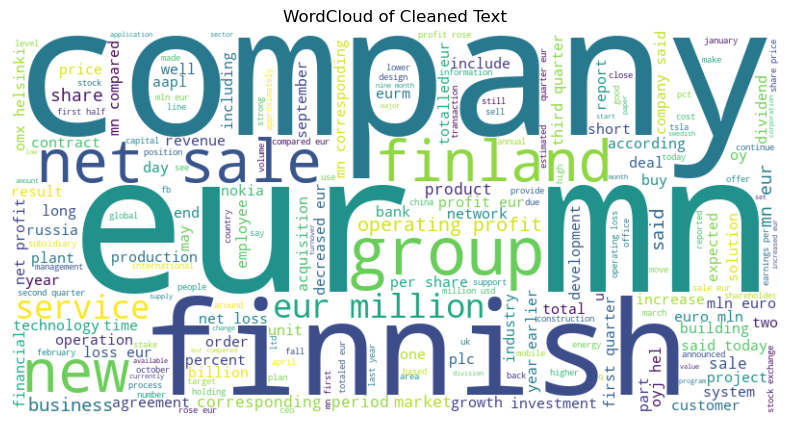

Top 10 Frequent Words: [('eur', 1627), ('company', 917), ('mn', 815), ('sale', 606), ('profit', 584), ('finnish', 527), ('share', 516), ('said', 516), ('net', 499), ('million', 494)]


In [13]:
from collections import Counter
from wordcloud import WordCloud

# Join all cleaned text
all_text = ' '.join(df['cleaned_sentence'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Cleaned Text")
plt.show()

# Top 10 frequent words
word_counts = Counter(all_text.split())
top_words = word_counts.most_common(10)
print("Top 10 Frequent Words:", top_words)

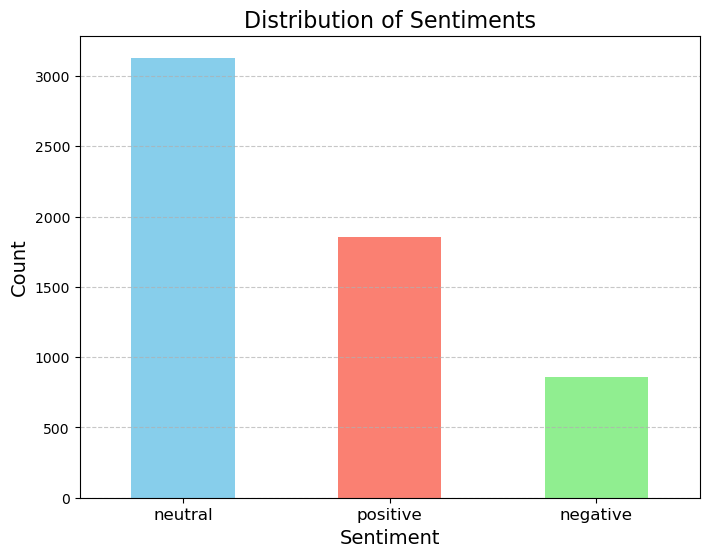

In [15]:
# Visualize the distribution of sentiment labels
import matplotlib.pyplot as plt

# Count the number of occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting the dataset into training and testing sets (80-20 split)
X = df['cleaned_sentence']  # Features (cleaned sentences)
y = df['Sentiment']  # Target (sentiments)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Output the shapes of the resulting datasets to confirm
X_train_tfidf.shape, X_test_tfidf.shape

((4673, 5000), (1169, 5000))

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the TF-IDF transformed training data
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)

# Display the results
print(f"Naive Bayes Model Accuracy: {accuracy_nb:.2f}\n")
print("Classification Report:\n")
print(classification_report_nb)

Naive Bayes Model Accuracy: 0.68

Classification Report:

              precision    recall  f1-score   support

    negative       0.67      0.03      0.07       172
     neutral       0.67      0.95      0.79       626
    positive       0.73      0.53      0.61       371

    accuracy                           0.68      1169
   macro avg       0.69      0.51      0.49      1169
weighted avg       0.69      0.68      0.63      1169



In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the TF-IDF transformed training data
lr_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

# Display the evaluation results
print(f"Logistic Regression Model Accuracy: {accuracy_lr:.2f}\n")
print("Classification Report:\n")
print(classification_report_lr)

Logistic Regression Model Accuracy: 0.69

Classification Report:

              precision    recall  f1-score   support

    negative       0.38      0.14      0.20       172
     neutral       0.69      0.88      0.78       626
    positive       0.75      0.62      0.68       371

    accuracy                           0.69      1169
   macro avg       0.61      0.55      0.55      1169
weighted avg       0.67      0.69      0.66      1169



In [25]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Check the class distribution after balancing
from collections import Counter
balanced_class_distribution = Counter(y_train_balanced)

# Display the class distribution before and after balancing
original_class_distribution = Counter(y_train)
original_class_distribution, balanced_class_distribution

(Counter({'neutral': 2504, 'positive': 1481, 'negative': 688}),
 Counter({'negative': 2504, 'neutral': 2504, 'positive': 2504}))

In [27]:
# Retrain Logistic Regression with balanced class weights
lr_model_balanced = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Train the model on the original (imbalanced) data with class weights
lr_model_balanced.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_lr_balanced = lr_model_balanced.predict(X_test_tfidf)

# Evaluate the model
accuracy_lr_balanced = accuracy_score(y_test, y_pred_lr_balanced)
classification_report_lr_balanced = classification_report(y_test, y_pred_lr_balanced)

# Display the evaluation results
print(f"Logistic Regression with Class Weights Accuracy: {accuracy_lr_balanced:.2f}\n")
print("Classification Report:\n")
print(classification_report_lr_balanced)

Logistic Regression with Class Weights Accuracy: 0.66

Classification Report:

              precision    recall  f1-score   support

    negative       0.34      0.47      0.39       172
     neutral       0.77      0.69      0.73       626
    positive       0.70      0.70      0.70       371

    accuracy                           0.66      1169
   macro avg       0.60      0.62      0.61      1169
weighted avg       0.69      0.66      0.67      1169



In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train the Random Forest model on the TF-IDF transformed training data
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

# Display the evaluation results
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}\n")
print("Classification Report:\n")
print(classification_report_rf)

Random Forest Model Accuracy: 0.63

Classification Report:

              precision    recall  f1-score   support

    negative       0.23      0.19      0.21       172
     neutral       0.65      0.79      0.72       626
    positive       0.75      0.56      0.64       371

    accuracy                           0.63      1169
   macro avg       0.55      0.51      0.52      1169
weighted avg       0.62      0.63      0.62      1169



In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

# Display the results
best_params_rf, best_score_rf

Fitting 3 folds for each of 216 candidates, totalling 648 fits


({'class_weight': 'balanced',
  'max_depth': None,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.6578241073963321)

In [35]:
# Train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_best_rf = best_rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
classification_report_best_rf = classification_report(y_test, y_pred_best_rf)

# Display the evaluation results
print(f"Tuned Random Forest Model Accuracy: {accuracy_best_rf:.2f}\n")
print("Classification Report:\n")
print(classification_report_best_rf)

Tuned Random Forest Model Accuracy: 0.64

Classification Report:

              precision    recall  f1-score   support

    negative       0.33      0.44      0.38       172
     neutral       0.71      0.74      0.72       626
    positive       0.72      0.56      0.63       371

    accuracy                           0.64      1169
   macro avg       0.59      0.58      0.58      1169
weighted avg       0.66      0.64      0.64      1169



In [37]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model with balanced class weights
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Train the SVM model on the TF-IDF transformed training data
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

# Display the evaluation results
print(f"SVM Model Accuracy: {accuracy_svm:.2f}\n")
print("Classification Report:\n")
print(classification_report_svm)

SVM Model Accuracy: 0.64

Classification Report:

              precision    recall  f1-score   support

    negative       0.32      0.51      0.39       172
     neutral       0.78      0.67      0.72       626
    positive       0.70      0.67      0.68       371

    accuracy                           0.64      1169
   macro avg       0.60      0.61      0.60      1169
weighted avg       0.68      0.64      0.66      1169



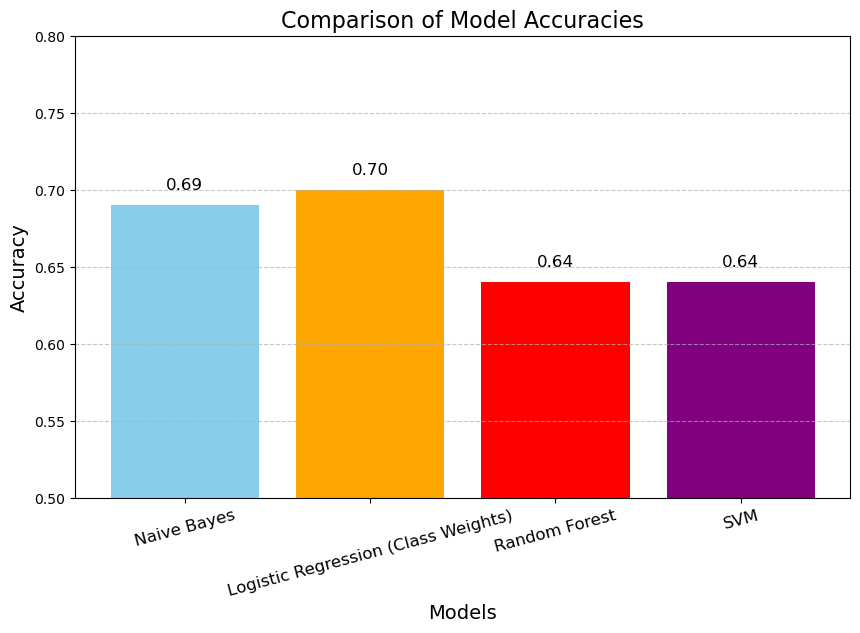

In [41]:
import matplotlib.pyplot as plt

# Collecting accuracy scores for each model
model_names = [
    "Naive Bayes",
    "Logistic Regression (Class Weights)",
    "Random Forest",
    "SVM",
]

accuracy_scores = [
    0.69,  # Naive Bayes
    0.70,  # Logistic Regression (Class Weights)
    0.64,  # Random Forest
    0.64,  # SVM
]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=["skyblue", "orange", "red", "purple"])
plt.title("Comparison of Model Accuracies", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.ylim(0.5, 0.8)
plt.xticks(rotation=15, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotating the bars with accuracy values
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha="center", fontsize=12)

plt.show()

In [43]:
import joblib

# Save the best model (Logistic Regression with Class Weights)
best_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
best_model.fit(X_train_tfidf, y_train)

# Save the model to a file
model_filename = 'lRM.pkl'
joblib.dump(best_model, model_filename)

# Save the TF-IDF vectorizer as well for future preprocessing
vectorizer_filename = 'vectorizer.pkl'
joblib.dump(tfidf_vectorizer, vectorizer_filename)

model_filename, vectorizer_filename

('lRM.pkl', 'vectorizer.pkl')